In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Wine Classification (Multiclass Classification)

In this project I build a simple machine learning model in Python to classify wine samples
into different cultivars based on their chemical properties. This demonstrates the full
pipeline: loading data, preparing features, training a classifier, and evaluating its performance.



In [5]:
from sklearn.datasets import load_wine

# Load the built-in wine dataset
wine = load_wine(as_frame=True)
df = wine.frame  # pandas DataFrame with features + target
df.head()




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Inspect the columns
df.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [7]:
# Separate features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

X.shape, y.shape


((178, 13), (178,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((142, 13), (36, 13))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



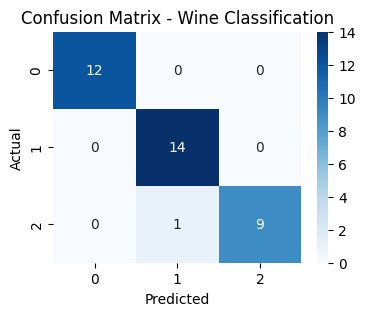

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Wine Classification")
plt.show()


## Summary

In this notebook I built a simple multiclass classification model on the built-in wine dataset from scikit-learn.

Steps:
- Loaded the wine dataset and explored its columns.
- Separated the chemical measurements as features and the cultivar label as the target.
- Split the data into training and test sets, and standardised the features.
- Trained a logistic regression classifier.
- Evaluated the model using accuracy, confusion matrix, and a classification report.

This demonstrates that I can:
- Work with tabular data in Python (pandas, NumPy)
- Prepare features and split data correctly
- Train and evaluate a basic machine learning classifier using scikit-learn
